In [1]:
from NHITS import NHITS_HierE2E, NHITS_CLOVER
from NBEATS import NBEATS_HierE2E, NBEATS_CLOVER
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import evaluation
import seaborn as sns
from hierarchicalforecast.utils import HierarchicalPlot
sns.set_theme('notebook', 'white')

/home/jovyan/.conda/envs/GPU/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-12 10:26:21,705	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-06-12 10:26:22,357	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


# Evaluate reconciliation method 

## Load and evaluate end-to-end models

In [2]:
models_dict = {
    'NHITS' : NHITS_HierE2E,
    'NBEATS' : NBEATS_HierE2E
}
recon = ['BU']
seed = ['CRPS']
runs = [0,1,2,3,4]
eval_HierE2E, Y_fin, _ = evaluation('HierE2E', models_dict, recon, seed, runs)

In [3]:
models_dict = {
    'NHITS' : NHITS_CLOVER,
    'NBEATS' : NBEATS_CLOVER,
}
recon = [5]
seed = ['CRPS']
runs = [0,1,2,3,4]
eval_CLOVER, Y_fin, _ = evaluation('CLOVER', models_dict, recon, seed, runs)

## Load ARIMA and NN performance

In [4]:
new_order = [
    # NBEATS block
    'NBEATS_0', 'NBEATS_1', 'NBEATS_2', 'NBEATS_3', 'NBEATS_4',
    'NBEATS/BottomUp_0', 'NBEATS/BottomUp_1', 'NBEATS/BottomUp_2',
    'NBEATS/BottomUp_3', 'NBEATS/BottomUp_4',
    'NBEATS/MinTrace_method-mint_shrink_0', 'NBEATS/MinTrace_method-mint_shrink_1',
    'NBEATS/MinTrace_method-mint_shrink_2', 'NBEATS/MinTrace_method-mint_shrink_3',
    'NBEATS/MinTrace_method-mint_shrink_4',
    
    # NHITS block
    'NHITS_0', 'NHITS_1', 'NHITS_2', 'NHITS_3', 'NHITS_4',
    'NHITS/BottomUp_0', 'NHITS/BottomUp_1', 'NHITS/BottomUp_2',
    'NHITS/BottomUp_3', 'NHITS/BottomUp_4',
    'NHITS/MinTrace_method-mint_shrink_0', 'NHITS/MinTrace_method-mint_shrink_1',
    'NHITS/MinTrace_method-mint_shrink_2', 'NHITS/MinTrace_method-mint_shrink_3',
    'NHITS/MinTrace_method-mint_shrink_4',
    
    # Remaining columns
    'level', 'metric'
]

/tmp/ipykernel_571332/1278561266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k], palette = 'husl')
/tmp/ipykernel_571332/1278561266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k], palette = 'husl')
/tmp/ipykernel_571332/1278561266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(evs, y='value', x = 'variable', ax = axs[k], palette = 'husl')
/tmp/ipykernel_571332/1278561266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` i

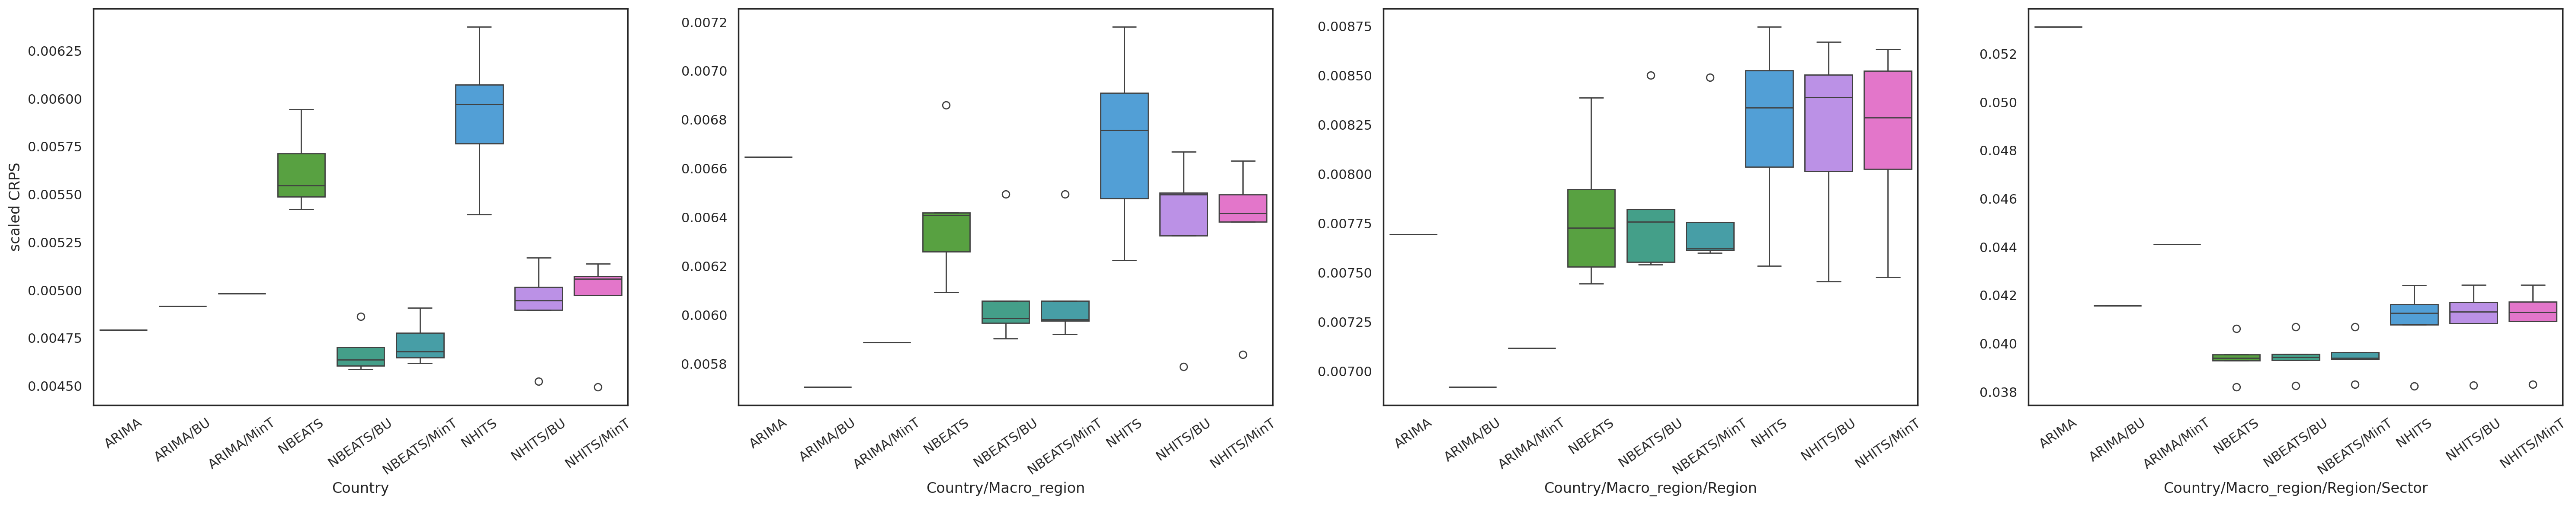

In [5]:
eval_nf = pd.read_parquet('./eval_nf.parquet')
eval_ARIMA = pd.read_parquet('./eval_ARIMA.parquet')
eval_nf = eval_nf[new_order]
eval_comb = pd.merge(eval_ARIMA, eval_nf, on = ['level', 'metric'])
fig, axs = plt.subplots(1,4, figsize = (30,6), sharex = True, dpi = 200)
evv = eval_comb.melt(id_vars = ['level', 'metric'])
evv['variable'] = evv['variable'].str.replace('_4', '')
evv['variable'] = evv['variable'].str.replace('_3', '')
evv['variable'] = evv['variable'].str.replace('_2', '')
evv['variable'] = evv['variable'].str.replace('_1', '')
evv['variable'] = evv['variable'].str.replace('_0', '')
T = evv.variable.unique()
for i,a in enumerate(T) :
    a = a.replace('BottomUp', 'BU')
    a = a.replace('Auto', '')
    a = a.replace('MinTrace_method-mint_shrink', 'MinT')
    T[i] = a
for k, level in zip(range(4),eval_nf['level'].unique()):
    evs = evv.query(f'metric == "scaled_crps" & level == "{level}"')
    sns.boxplot(evs, y='value', x = 'variable', ax = axs[k], palette = 'husl')
    axs[k].set_ylabel(' ')
    axs[k].set_xlabel(f'{level}')
    axs[0].set_ylabel('scaled CRPS')
    axs[k].set_xticks(ticks = range(9), labels= T, rotation=35) 
plt.tight_layout()
plt.savefig('./benchmarks_ARIMA_NN', dpi = 400, transparent = True)

In [6]:
eval_comb = pd.merge(eval_ARIMA, eval_nf, on = ['level', 'metric'])
eval_comb = pd.merge(eval_comb, eval_CLOVER, on = ['level', 'metric'])
eval_comb = pd.merge(eval_comb, eval_HierE2E, on = ['level', 'metric'])

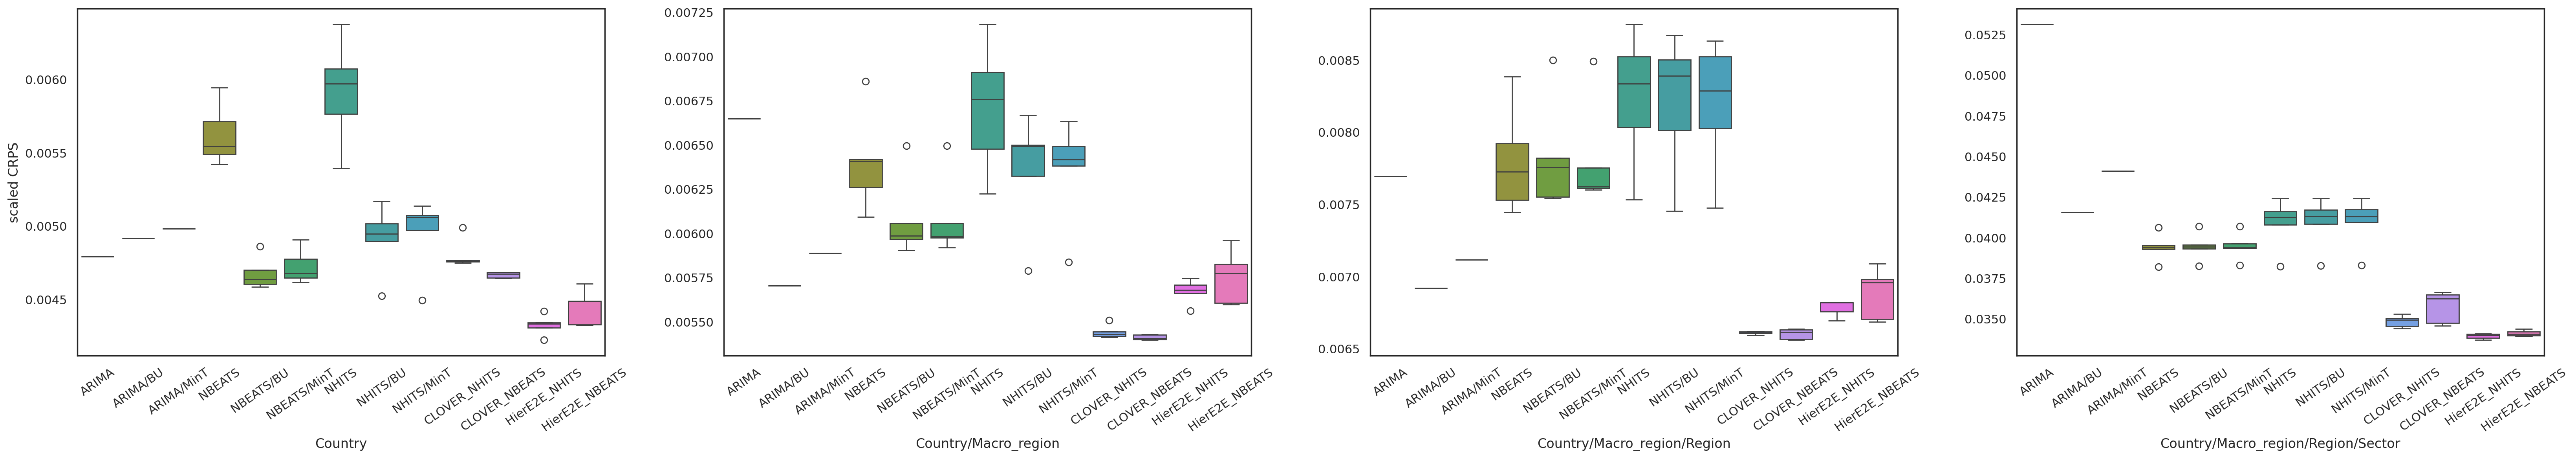

In [8]:
fig, axs = plt.subplots(1,4, figsize = (33,6), sharex = True, dpi = 200)
evv = eval_comb.melt(id_vars = ['level', 'metric'])
evv['variable'] = evv['variable'].str.replace('_4', '')
evv['variable'] = evv['variable'].str.replace('_3', '')
evv['variable'] = evv['variable'].str.replace('_2', '')
evv['variable'] = evv['variable'].str.replace('_1', '')
evv['variable'] = evv['variable'].str.replace('_0', '')
T = evv.variable.unique()
for i,a in enumerate(T) :
    a = a.replace('BottomUp', 'BU')
    a = a.replace('Auto', '')
    a = a.replace('MinTrace_method-mint_shrink', 'MinT')
    a = a.replace('_5_CRPS', '')
    a = a.replace('_BU_CRPS', '')
    
    T[i] = a
for k, level in zip(range(4),eval_comb['level'].unique()[:]):
    evs = evv.query(f'metric == "scaled_crps" & level == "{level}"')
    sns.boxplot(evs, y='value', x = 'variable', ax = axs[k], hue = 'variable', palette = 'husl')
    axs[k].set_ylabel(' ')
    axs[k].set_xlabel(f'{level}')
    axs[0].set_ylabel('scaled CRPS')
    axs[k].set_xticks(ticks = range(13), labels= T, rotation=35) 
plt.tight_layout();
plt.savefig('./benchmark_E2E_models', dpi = 200, transparent = True)